<a href="https://colab.research.google.com/github/anaguilarar/CC_Weight_Prediction/blob/main/1_Individual_data_extraction_using_bounding_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Individual plant imagery extraction

In this example, we will use spatial file, containing bounding boxes, to extract UAV-based data. The UAV data sources used in this process include RGB orthomosaic, multi-spectral (MS) orthomosaic, and 3D point cloud data. For each bounding box, we will extract the corresponding information and combine it into a single 4D image representation, encompassing time points, channels, width, and height dimensions.

In [1]:
import os
## clonning repositories
if not os.path.exists("/content/drone_data") and not os.getcwd().endswith("/content/drone_data"):
    !git clone https://github.com/anaguilarar/drone_data.git
    print("Cloned")

else:
    print("drone_data directory already exists")

Cloning into 'drone_data'...
remote: Enumerating objects: 1273, done.
remote: Counting objects: 100% (285/285), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 1273 (delta 193), reused 153 (delta 70), pack-reused 988
Receiving objects: 100% (1273/1273), 17.25 MiB | 10.51 MiB/s, done.
Resolving deltas: 100% (946/946), done.
Cloned


In [2]:
## installing packages
!pip install -r /content/drone_data/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.6/852.6 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 67.3 MB/s eta 0:00:00



### Data downloading

The data that we will use as an example the information captured on 29th September and 4th October. Besides, we will also use vector files that indicate the individual plant bounding boxes. This data is storaged in a google drive folder. Thus, the information will be uploaded to the colab storage using the folowing cell.

In [3]:
import tqdm
def download_from_drive(urlid, drive):
  file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(urlid)}).GetList()
  if len(file_list)>0:
    for j in tqdm.tqdm(range(len(file_list)), leave  = False):
      linkto = file_list[j]['id']
      file_listsub = drive.ListFile({'q': "'{}' in parents and trashed=false".format(linkto)}).GetList()
      if len(file_listsub)>0:
        foldername = file_list[j]['title']
        if not os.path.exists(foldername):
          os.mkdir(foldername)
        os.chdir(foldername)
        download_from_drive(linkto, drive)
        os.chdir('..')

      else:
        #for i, file in enumerate(sorted(file_list, key = lambda x: x['title']), start=1):
        file = file_list[j]

        file.GetContentFile(file['title'])

In [4]:

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


spatial_boundaries = '1YjKEgdUJ5edicNMNbevox4rXPPosbPDp'
uavdata = '1x5O2fkY2YpxNkeIjP3hKPMSohM4w9W1o'

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
## this is gonna take few minutes
for linktod in [spatial_boundaries, uavdata]:
  download_from_drive(linktod, drive)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:05<01:12,  5.15s/it]

 13%|█▎        | 2/15 [00:05<00:31,  2.45s/it]

 20%|██        | 3/15 [00:06<00:19,  1.61s/it]

 27%|██▋       | 4/15 [00:09<00:25,  2.34s/it]

 33%|███▎      | 5/15 [00:10<00:16,  1.70s/it]

 40%|████      | 6/15 [00:10<00:11,  1.31s/it]

 47%|████▋     | 7/15 [00:15<00:19,  2.40s/it]

 53%|█████▎    | 8/15 [00:16<00:12,  1.79s/it]

 60%|██████    | 9/15 [00:16<00:08,  1.41s/it]

 67%|██████▋   | 10/15 [00:21<00:11,  2.39s/it]

 73%|███████▎  | 11/15 [00:21<00:07,  1.82s/it]

 80%|████████  | 12/15 [00:22<00:04,  1.39s/it]

 87%|████████▋ | 13/15 [00:25<00:04,  2.13s/it]

 93%|█████████▎| 14/15 [00:26<00:01,  1.64s/it]

100%|██████████| 15/15 [00:26<00:00,  1.31s/it]

                                               
 33%|███▎      | 1/3 [00:27<00:55, 27.50s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:43<00:00, 43.07s/it]

              

### Imagery extraction

For this example, we will utilize the "IndividualUAVData" function, which takes directory paths for each multisourcing data as its arguments. The information extraction process will involve using bounding boxes, which are represented in the format of a GeoPandas dataframe.

In [5]:
#### import packages

from drone_data.utils.multipolygons_functions import IndividualUAVData
import numpy as np
import geopandas as gpd

<Axes: >

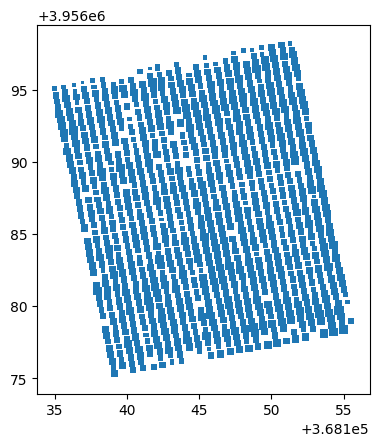

In [6]:
#### list images information

RGBFILES = [
		'/content/dc_3_20210929/RGB_orthomosaic/',
		'/content/dc_4_20211004/RGB_orthomosaic/']

POINTCLOUD = [
		'/content/dc_3_20210929/point_cloud/',
		'/content/dc_4_20211004/point_cloud/']

MSFILES = [
		'/content/dc_3_20210929/MS_orthomosaic/',
		'/content/dc_4_20211004/MS_orthomosaic/']

bbfile = "/content/cc_od_polygons_yolodr5m_tana_ov_65conf_mn_tp.shp" ## boundary boxes file path
## reading geopnadas file
roiorig = gpd.read_file(bbfile)

roiorig.plot()


#### Imagery stacking

Here we will show the individual plant imagery for an example. The registration process (aligning and resample) is done based on the RGB image.

In [7]:
import time

j = 100 ## and index to highlight the bounding box
individualbb = roiorig.iloc[j:j+1]

datalist = []
st = time.time()
for i in range(len(RGBFILES)):

    uavdata = IndividualUAVData(rgb_input = RGBFILES[i],
                ms_input = MSFILES[i],
                threed_input = POINTCLOUD[i],
                spatial_boundaries = individualbb)
    ## extract the data from the RGB orthomosaic
    uavdata.rgb_uavdata()
    print('Execution time RGB:', -st + time.time(), 'seconds')
    ## extract the data from the MS orthomosaic
    uavdata.ms_uavdata()
    print('Execution time MS:', -st + time.time(), 'seconds')
    ## transform from 3D point cloud to a 2D image
    uavdata.pointcloud(interpolate = True ## it will create a height image from the point cloud
                       )
    print('Execution time point cloud:', -st + time.time(), 'seconds')
    ## stack all data in a single image (channels, width, height). the re
    uavdata.stack_uav_data(bufferdef = None,
        rgb_asreference = True,
        resample_method = 'nearest')

    ## vegetation indices

    datalist.append(uavdata.uav_sources['stacked'])


Execution time RGB: 0.7656145095825195 seconds
Execution time MS: 1.1210863590240479 seconds
Execution time point cloud: 24.508991956710815 seconds
Execution time RGB: 25.33176302909851 seconds
Execution time MS: 25.65580463409424 seconds
Execution time point cloud: 52.373345613479614 seconds


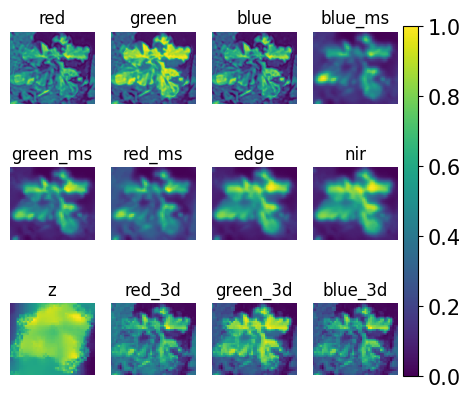

In [8]:
from drone_data.utils.plt_functions import plot_multibands
## single time point image visualization
f = plot_multibands(datalist[1], num_rows = 3, num_columns= 4, figsize = (5,5), fontname = None)

### Multi-temporal stacking

In this example we have two time points imagery, we will create a single image by stacking that information into a single one. We use the Xarray package to create the cube data. This has the advantage of allowing the user to name each dimension and gave them names.


image dates: [datetime.datetime(2021, 9, 29, 0, 0), datetime.datetime(2021, 10, 4, 0, 0)]


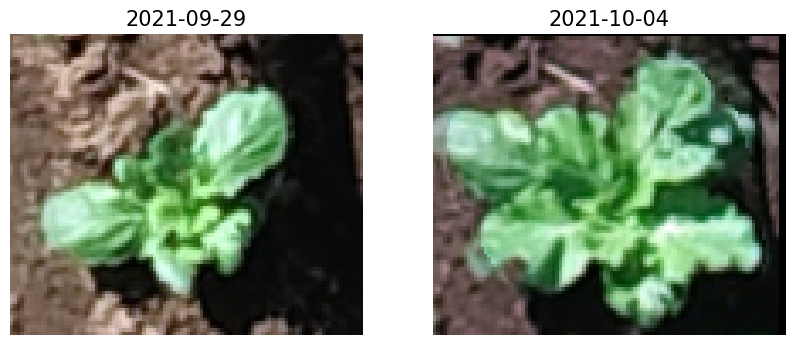

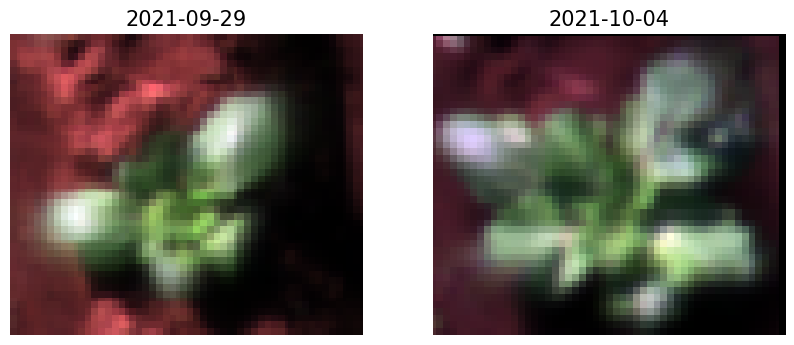

In [9]:
from drone_data.utils.data_processing import find_date_instring
from drone_data.utils.xr_functions import stack_as4dxarray
from drone_data.utils.plt_functions import plot_multitemporal_rgb
from datetime import datetime

capturedates = [find_date_instring(RGBFILES[i]) for i in range(len(RGBFILES))]
datesnames = [datetime.strptime(m,'%Y%m%d') for m in capturedates]
print(f'image dates: {datesnames}')

## multitemporal data

uavmltdata = stack_as4dxarray(datalist,axis_name = 'date',
            valuesaxis_names=datesnames,
            resizeinter_method = 'nearest')

f1= plot_multitemporal_rgb(uavmltdata, ncols = 2,nrows = 1, figsize= (10,4),
                        bands=['red','green','blue'], scale = 'minmax', fontname = None)

f2= plot_multitemporal_rgb(uavmltdata, ncols = 2,nrows = 1, figsize= (10,4),
                        bands=['red_ms','green_ms','blue_ms'], scale = 'minmax', fontname = None)


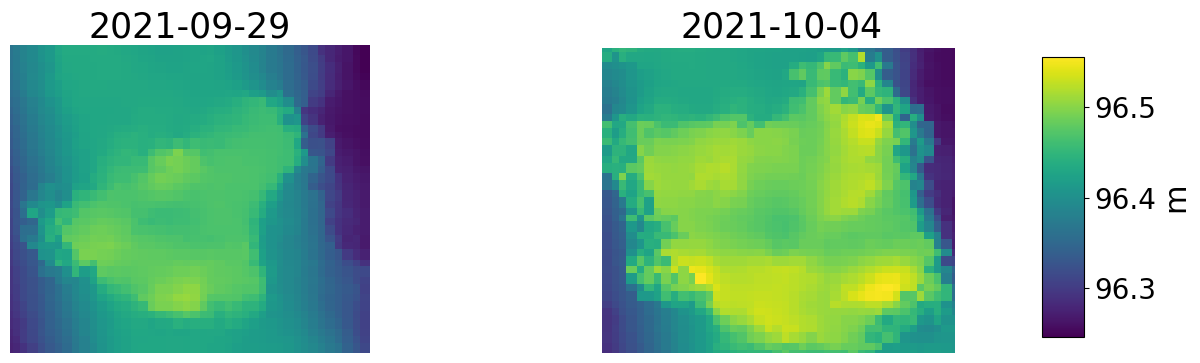

In [10]:
from drone_data.utils.plt_functions import plot_multichanels
datelabesl = [np.datetime_as_string(i, unit='D') for i in uavmltdata.date.values]

f = plot_multichanels(uavmltdata.z.values, num_rows=1, num_columns=2,
                      figsize= (14,4),fontsize=25, legtickssize=20,label_name= 'm',
                      legfontsize=22,chanels_names=datelabesl, fontname = None)